# Task 1 Analysis of Individual Stocks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
from scipy.optimize import minimize

In [2]:
# Define the list of stocks and the date range for analysis
stock_list = ['AAPL', 'GOOGL', 'META', 'AMD',  'MSFT']
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days=1200)

# Use yfinance to download stock data in bulk
data = yf.download(stock_list, start=start_date, end=end_date)
print(data.head())

[*********************100%%**********************]  5 of 5 completed

Price        Adj Close                                                \
Ticker            AAPL        AMD      GOOGL        META        MSFT   
Date                                                                   
2020-12-15  125.500580  97.120003  88.054001  275.257935  208.144806   
2020-12-16  125.431854  96.849998  87.859497  275.377838  213.150879   
2020-12-17  126.305313  96.839996  87.025497  274.189087  213.286926   
2020-12-18  124.303276  95.919998  86.310997  276.107025  212.480133   
2020-12-21  125.844055  93.230003  86.727997  272.500885  216.368317   

Price            Close                                                ...  \
Ticker            AAPL        AMD      GOOGL        META        MSFT  ...   
Date                                                                  ...   
2020-12-15  127.879997  97.120003  88.054001  275.549988  214.130005  ...   
2020-12-16  127.809998  96.849998  87.859497  275.670013  219.279999  ...   
2020-12-17  128.699997  96.839996  87.

### 1.1 Trend Analysis

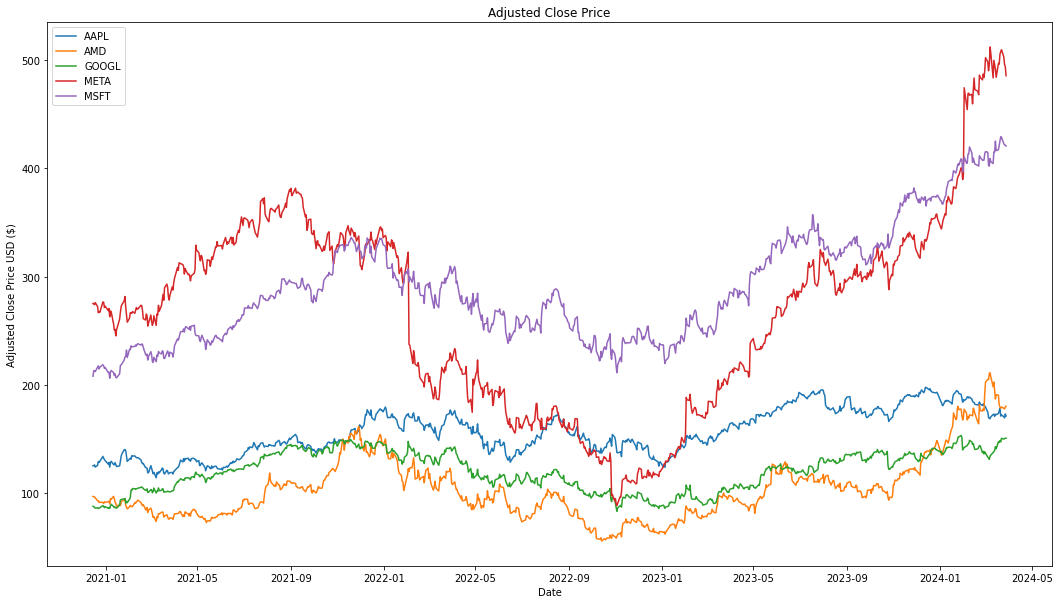

In [3]:
# Plotting the adjusted close prices
plt.figure(figsize=(18, 10))
for c in data['Adj Close'].columns.values:
    plt.plot(data['Adj Close'][c], label=c)

plt.title('Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price USD ($)')
plt.legend(data['Adj Close'].columns.values, loc='upper left')
plt.show()


### 1.2 Moving Averages

Calculating moving averages is an essential part of technical analysis. They can help identify trends by smoothing out the noise from random price fluctuations. 

Simple Moving Averages (SMAs): These are used to smooth out price data to identify the trend direction over different time frames. The SMAs on the chart represent averages over 10, 50, and 150 days, indicating short-term, medium-term, and long-term trends respectively.

The 10-Day SMA is the average of the adjusted closing prices over the last 10 days. It's very responsive to daily price changes, which makes it a good indicator of immediate trend direction but also more susceptible to false signals due to its sensitivity.

The 50-Day SMA is a more balanced view, smoothing out the price data over a longer period. It's less sensitive to daily price movements and provides a clearer view of the mid-term trend.

The 150-Day SMA gives a broad overview of the long-term market trend, significantly reducing the 'noise' from short-term price fluctuations.

When the short-term SMA (10-day) crosses above a longer-term SMA (50-day or 150-day), it's typically considered a bullish signal, suggesting an uptrend.

Conversely, if the short-term SMA crosses below a longer-term SMA, it could indicate a bearish signal or a potential downtrend.

The distance between the SMAs can also indicate the strength of a trend. Wider gaps may suggest stronger trends, while narrower ones may suggest weakening trends or periods of consolidation.

The adjusted close price is depicted with a light transparency, allowing us to focus on the moving averages while still observing the actual price movements.

In this chart, we can see instances where the SMAs cross over each other. These points can be significant for traders who use these signals to make buy or sell decisions.

The chart also shows periods where the price deviates significantly from the SMAs, which might attract traders looking for reversion to the mean trading opportunities.


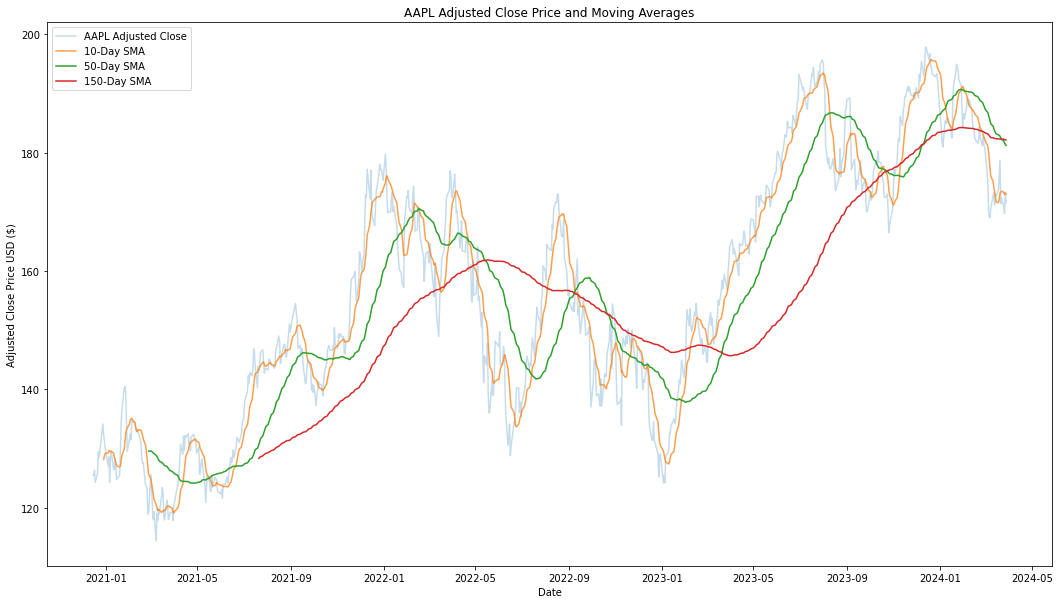

In [4]:
# AAPL's Adjusted Close data is extracted from the 'data' DataFrame
AAPL_data = data['Adj Close']['AAPL']

# Calculate Simple Moving Averages for 10, 50, and 150 days
AAPL_sma10 = AAPL_data.rolling(window=10).mean()
AAPL_sma50 = AAPL_data.rolling(window=50).mean()
AAPL_sma150 = AAPL_data.rolling(window=150).mean()


# Create a plot with a specified figure size
plt.figure(figsize=(18, 10))

# Plot the Adjusted Close Price and the SMAs with different alpha values for visibility
plt.plot(AAPL_data, label='AAPL Adjusted Close', alpha=0.25)
plt.plot(AAPL_sma10, label='10-Day SMA', alpha=0.75)
plt.plot(AAPL_sma50, label='50-Day SMA', alpha=1)
plt.plot(AAPL_sma150, label='150-Day SMA', alpha=1)

# Add title and labels to the plot
plt.title('AAPL Adjusted Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price USD ($)')

# Add a legend to the upper left corner of the plot
plt.legend(loc='upper left')

# Display the plot
plt.show()


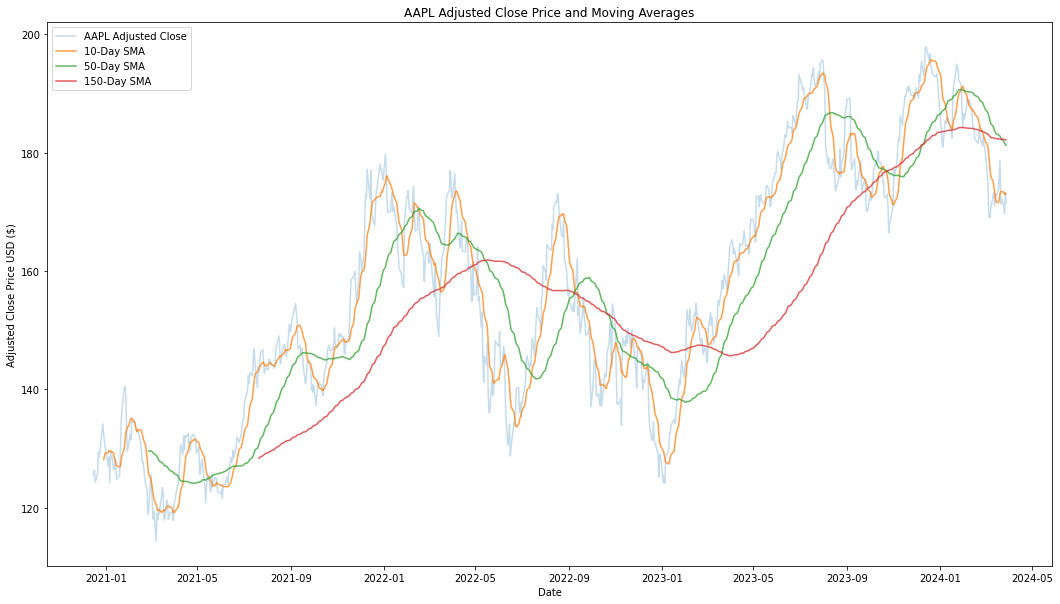

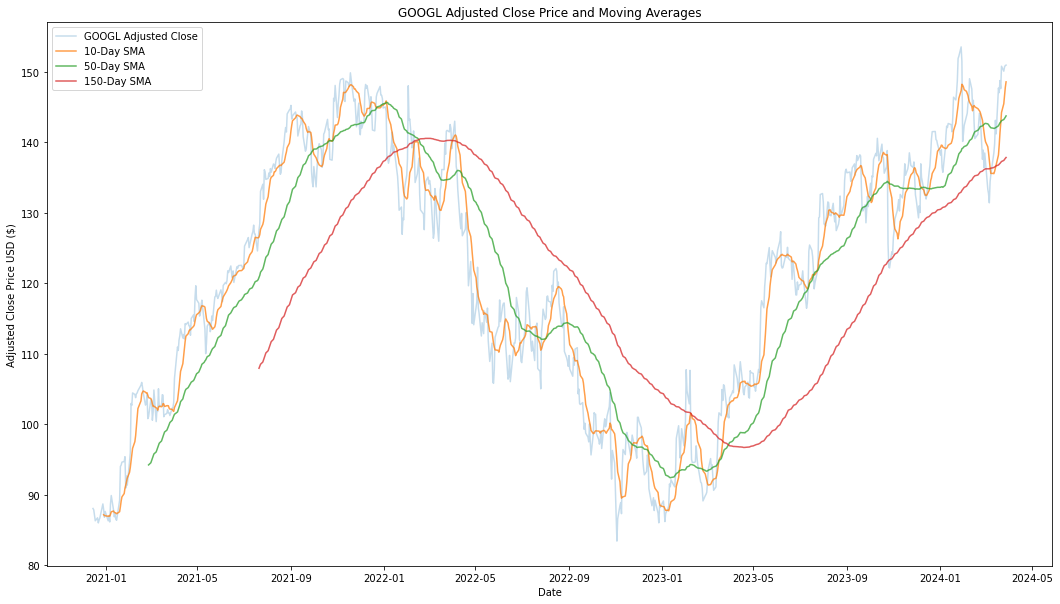

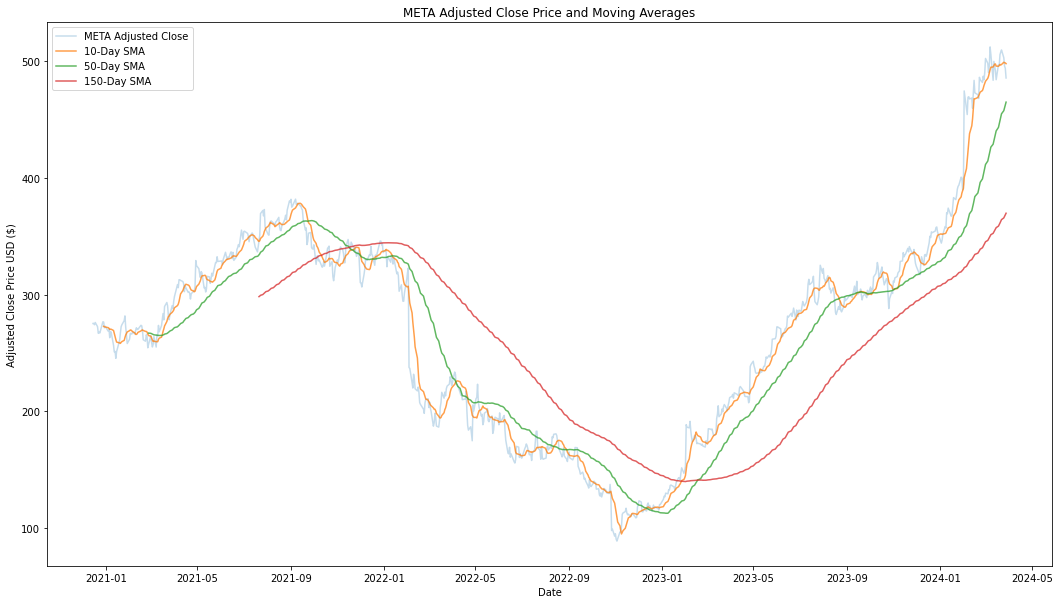

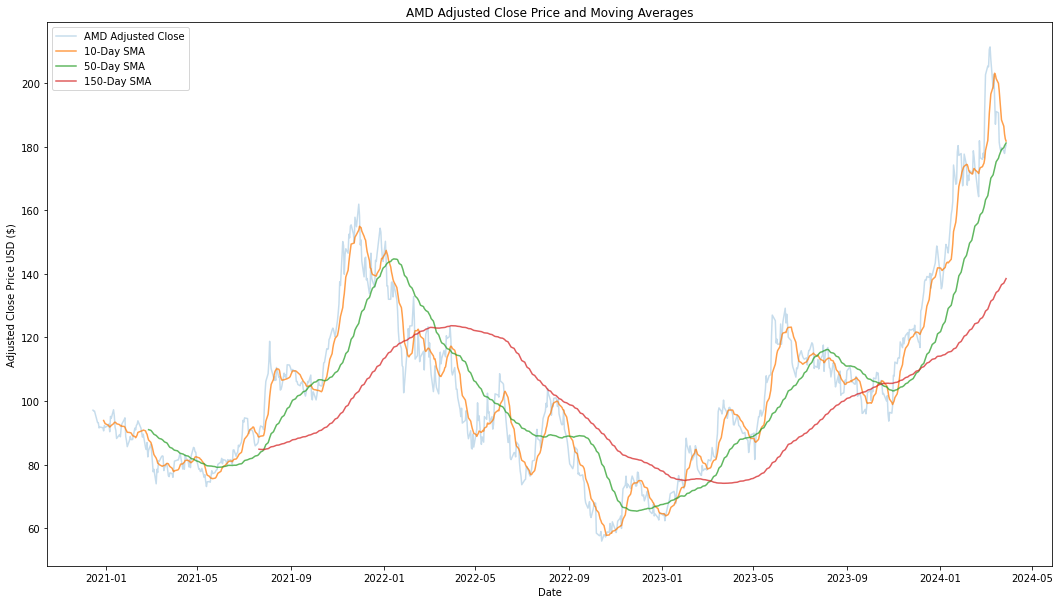

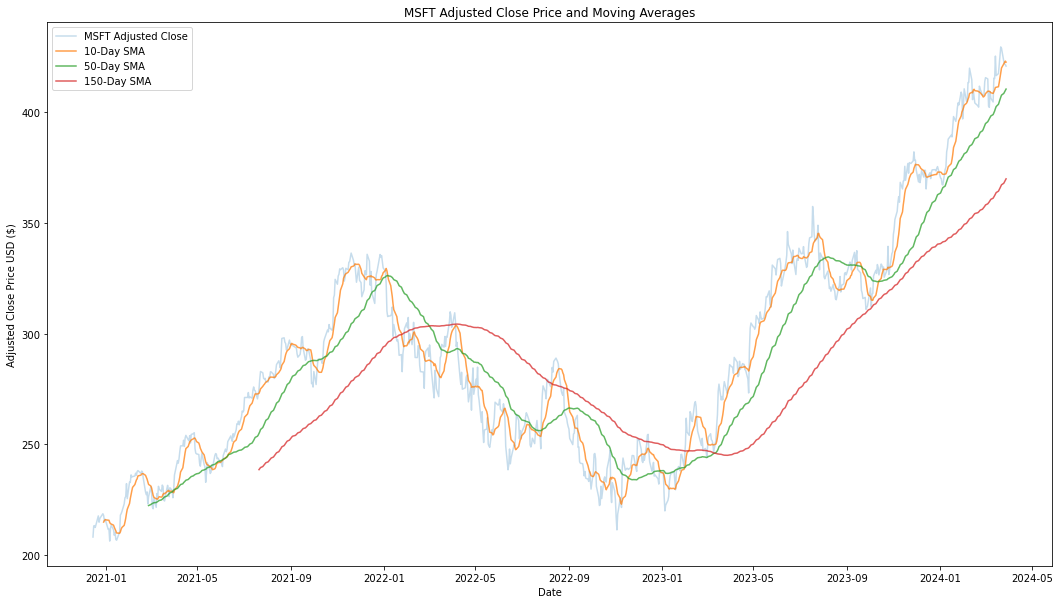

In [5]:
### Function to Plot Adjusted Close Prices and Moving Averages for Any Stock:

def plot_stock_with_sma(stock_ticker, data, windows=[10, 50, 150]):
    """
    Plot the Adjusted Close prices for a given stock and its Simple Moving Averages.
    
    Parameters:
        stock_ticker (str): The stock ticker symbol.
        data (DataFrame): The DataFrame containing the stock's historical data.
        windows (list of int): The list of time windows to calculate SMAs for.
    """
    # Get the Adjusted Close data for the given stock ticker
    stock_data = data['Adj Close'][stock_ticker]
    
    # Initialize the plot
    plt.figure(figsize=(18, 10))
    
    # Plot the Adjusted Close price
    plt.plot(stock_data, label=f'{stock_ticker} Adjusted Close', alpha=0.25)
    
    # Calculate and plot SMAs for the specified windows
    for window in windows:
        sma = stock_data.rolling(window=window).mean()
        plt.plot(sma, label=f'{window}-Day SMA', alpha=0.75)
    
    # Add title and labels
    plt.title(f'{stock_ticker} Adjusted Close Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Adjusted Close Price USD ($)')
    
    # Show the legend
    plt.legend(loc='upper left')
    
    # Display the plot
    plt.show

# Loop through each stock in the stock list and plot the adjusted close prices and SMAs
for stock in stock_list:
    plot_stock_with_sma(stock_ticker=stock, data=data)

### 1.3 Returns and Volatility

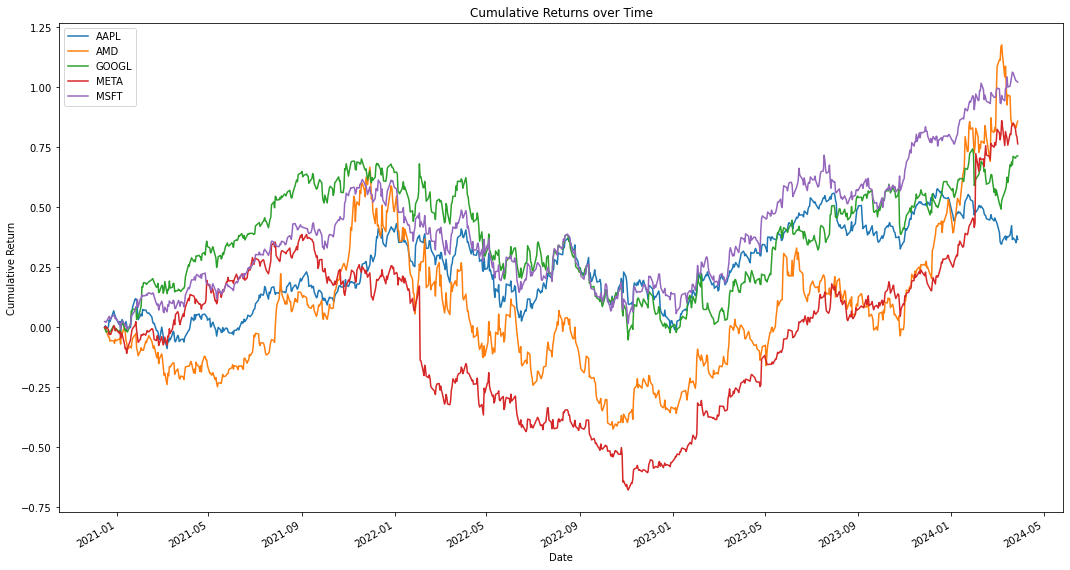

In [6]:
# Calculate daily returns for each stock
daily_returns = data['Adj Close'].pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + daily_returns).cumprod() - 1

# Plot cumulative returns for each stock - the growth of a dollar invested over time
cumulative_returns.plot(figsize=(18, 10))
plt.title('Cumulative Returns over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()



Volatility:
Ticker
AAPL     0.273564
AMD      0.507943
GOOGL    0.312994
META     0.470434
MSFT     0.271865
dtype: float64


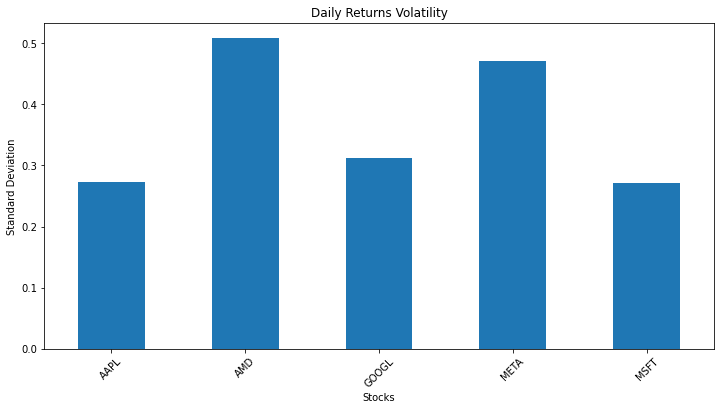

In [7]:
# Volatility analysis - calculate and plot standard deviation of daily returns

# Standard deviation is used to measure the daily volatility of the stock returns.

# Annualizing the standard deviation - Multiplying by the square root of 252 (the typical number of trading days in a year) 
volatility = daily_returns.std() * np.sqrt(252)

# Printing the volatility gives a quick overview of the risk profile of each stock
print("Volatility:")
print(volatility)

# Plotting volatility in a bar chart for better visual comparison
plt.figure(figsize=(12, 6))
volatility.plot(kind='bar')
plt.title('Daily Returns Volatility')
plt.ylabel('Standard Deviation')
plt.xlabel('Stocks')
plt.xticks(rotation=45)
plt.show()


In [8]:
# Risk-Free Rate Calculation
tnx = yf.Ticker("^IRX")
tnx_data = tnx.history(period="1mo")
risk_free_rate = tnx_data['Close'].mean() / 100  # Convert to percentage
print(f"The average risk-free rate over the past month is: {risk_free_rate}")

The average risk-free rate over the past month is: 0.05227238087427048


In [9]:
# Sharpe Ratio Calculation
annualized_returns = daily_returns.mean() * 252
sharpe_ratio = (annualized_returns - risk_free_rate) / volatility
print("\nSharpe Ratio:\n", sharpe_ratio)


Sharpe Ratio:
 Ticker
AAPL     0.293995
AMD      0.522519
GOOGL    0.515528
META     0.496215
MSFT     0.734354
dtype: float64


### 1.4 S&P 500 Comparison

[*********************100%%**********************]  1 of 1 completed


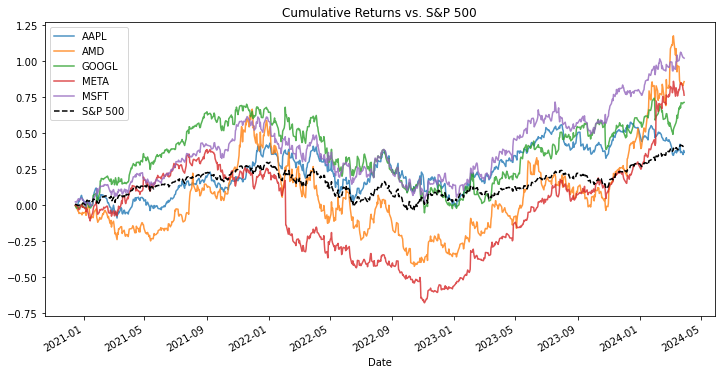

In [10]:
# Download historical data for S&P 500
sp500 = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']

# Calculate daily and cumulative returns for S&P 500
sp500_daily_returns = sp500.pct_change()
#daily_returns['S&P 500'] = sp500_daily_returns  # Adding S&P 500 returns for correlation analysis
cumulative_returns = (1 + daily_returns).cumprod() - 1  # Recalculate with S&P 500 included
sp500_cumulative_returns = (1 + sp500_daily_returns).cumprod() - 1 

# Plot cumulative returns for each stock against S&P 500
cumulative_returns.plot(figsize=(12, 6),alpha=0.8)
plt.plot(sp500_cumulative_returns, label='S&P 500', color='black', linestyle='--')
plt.title('Cumulative Returns vs. S&P 500')
plt.legend()
plt.show()


Correlation with S&P 500:
 Ticker
AAPL       0.789562
AMD        0.669406
GOOGL      0.733457
META       0.617905
MSFT       0.782614
S&P 500    1.000000
Name: S&P 500, dtype: float64


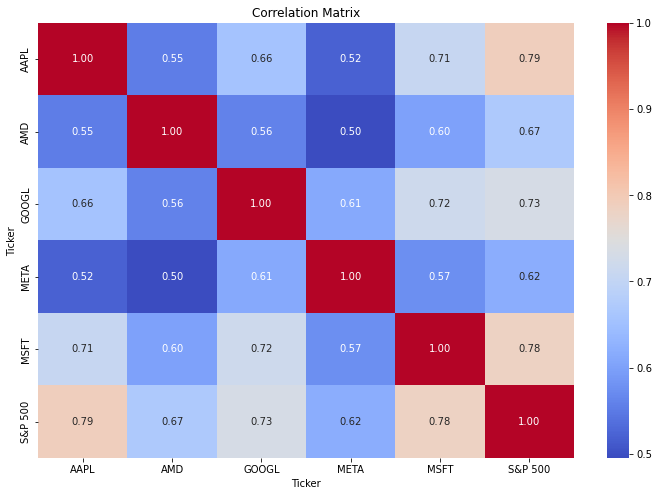


Covariance Matrix including S&P 500:
 Ticker       AAPL       AMD     GOOGL      META      MSFT   S&P 500
Ticker                                                             
AAPL     0.000297  0.000305  0.000223  0.000266  0.000209  0.000147
AMD      0.000305  0.001024  0.000353  0.000470  0.000330  0.000231
GOOGL    0.000223  0.000353  0.000389  0.000358  0.000243  0.000156
META     0.000266  0.000470  0.000358  0.000878  0.000292  0.000197
MSFT     0.000209  0.000330  0.000243  0.000292  0.000293  0.000144
S&P 500  0.000147  0.000231  0.000156  0.000197  0.000144  0.000116


In [11]:
# Correlation Matrix
daily_returns['S&P 500'] = sp500_daily_returns
correlation_matrix = daily_returns.corr()
print("\nCorrelation with S&P 500:\n", correlation_matrix['S&P 500'])

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Covariance Matrix
covariance_matrix = daily_returns.cov()
print("\nCovariance Matrix including S&P 500:\n", covariance_matrix)

In [12]:
# Beta Analysis
cov_with_sp500 = covariance_matrix['S&P 500']
variance_sp500 = sp500_daily_returns.var()
beta = cov_with_sp500 / variance_sp500
print("\nBeta Coefficients:\n", beta)


Beta Coefficients:
 Ticker
AAPL       1.263117
AMD        1.988395
GOOGL      1.342484
META       1.699882
MSFT       1.244225
S&P 500    1.000000
Name: S&P 500, dtype: float64
